# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-05-06 13:07:05.086065: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 13:07:05.086242: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 13:07:05.088432: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 13:07:05.115407: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 13:07:05.730518: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=1, seed=0)
# plt.imshow(model.hidden_weights[0], cmap="coolwarm")
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


Epoch 36/45: accuracy 9.400%
Epoch 37/45: accuracy 10.300%
Epoch 38/45: accuracy 8.500%
Epoch 39/45: accuracy 8.900%
Epoch 40/45: accuracy 9.100%
Epoch 41/45: accuracy 11.200%
Epoch 42/45: accuracy 9.100%
Epoch 43/45: accuracy 9.100%
Epoch 44/45: accuracy 8.700%
Epoch 45/45: accuracy 10.400%


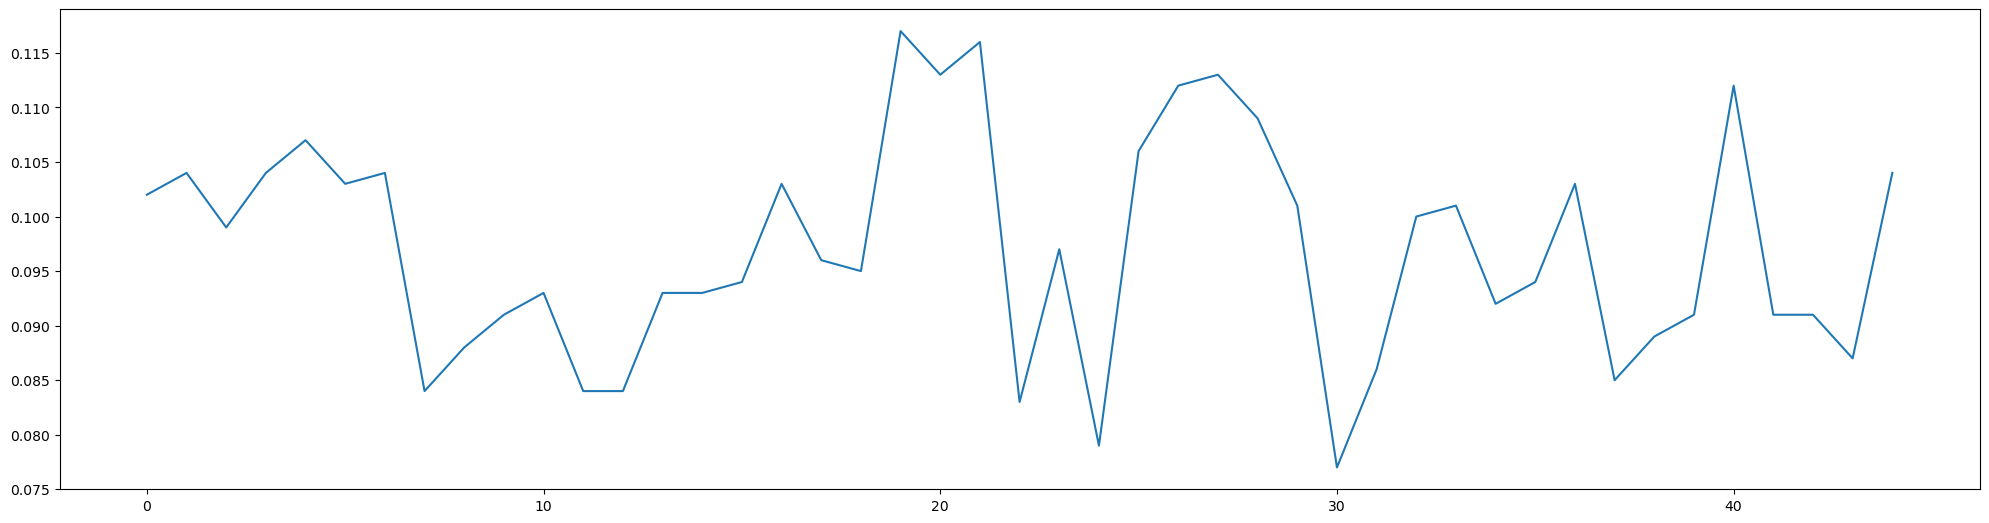

In [13]:
model.fit(train_images, train_labels, epochs=10)
plt.figure().add_axes([0,0,3,1]).plot(model.accuracy_history); plt.show()

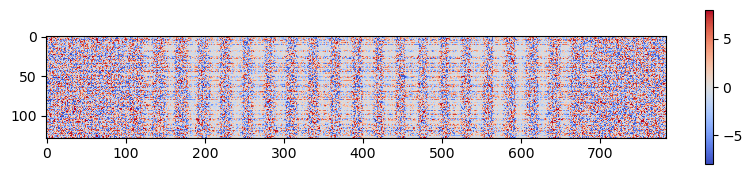

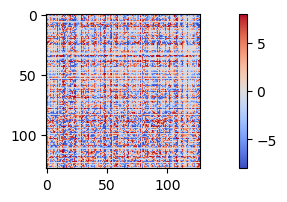

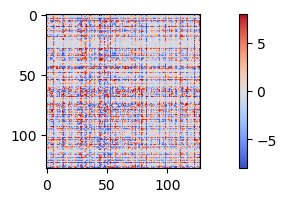

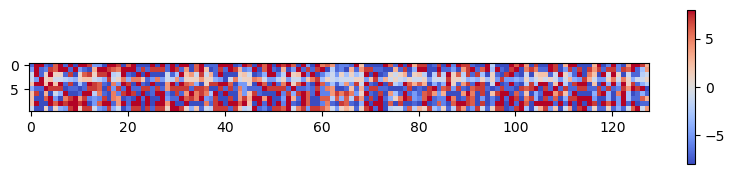

In [7]:
def show_weights(weights):
    plt.figure(figsize = (10, 2))
    plt.imshow(weights, cmap="coolwarm")
    plt.colorbar(orientation="vertical")
    plt.show()

show_weights(model.input_weights)
for l in range(model.config["layers"] - 1):
    show_weights(model.hidden_weights[l])
show_weights(model.output_weights)
# model.output_weights

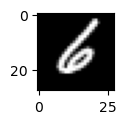

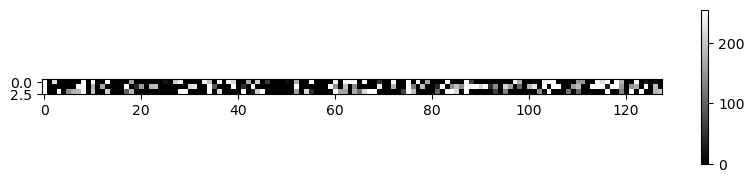

[255 199   0   0 255 207 255 255 255   0] --> 0


In [8]:
plt.figure(figsize = (1, 1))
plt.imshow(train_images[N-1].reshape(28, 28), cmap="grey")
plt.show()
# for l in range(model.config["layers"]):
#     print(model.last_intermediate_outputs[l])
plt.figure(figsize = (10, 2))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="vertical")
plt.show()
print(model.last_outputs, "-->", model.last_answer)